In [1]:
import sys
sys.path.append('../')

from ift6758.features import tidy_data

In [2]:
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
f = open("../ift6758/data/dataset/2016_regular.json",)
json_data = json.load(f)
extracted_data = tidy_data.extract_data_from_json(json_data)
df_r = tidy_data.tidy_data(extracted_data)

In [11]:
f = open("../ift6758/data/dataset/2016_playoffs.json",)
json_data = json.load(f)
extracted_data = tidy_data.extract_data_from_json(json_data)
df_p = tidy_data.tidy_data(extracted_data)

In [16]:
df = pd.concat([df_r,df_p], axis=0)

In [17]:
df

,GamePk,GameDuration,EventTypeId,DateTime,PeriodTimeRemaining,Period,Team.id,Team.name,Shooter,Goalie,Coordinates.x,Coordinates.y,ShotType,homeAway,rinkSide,Scorer,Assist,Strength
0,2016020001,0 days 01:05:00,SHOT,2016-10-12T23:19:59Z,18:49,1,10,Toronto Maple Leafs,8478483.0,8467950.0,-77.0,5.0,Wrist Shot,away,right,NaN,NaN,NaN
1,2016020001,0 days 01:05:00,SHOT,2016-10-12T23:21:41Z,17:07,1,9,Ottawa Senators,8467967.0,8475883.0,86.0,13.0,Wrist Shot,home,left,NaN,NaN,NaN
2,2016020001,0 days 01:05:00,SHOT,2016-10-12T23:23:17Z,15:59,1,9,Ottawa Senators,8476879.0,8475883.0,23.0,-38.0,Wrist Shot,home,left,NaN,NaN,NaN
3,2016020001,0 days 01:05:00,SHOT,2016-10-12T23:24:02Z,15:14,1,9,Ottawa Senators,8474578.0,8475883.0,33.0,-15.0,Slap Shot,home,left,NaN,NaN,NaN
4,2016020001,0 days 01:05:00,SHOT,2016-10-12T23:27:30Z,13:14,1,10,Toronto Maple Leafs,8475716.0,8467950.0,-34.0,28.0,Wrist Shot,away,right,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,2016030416,0 days 01:00:00,SHOT,2017-06-12T02:37:01Z,09:43,3,5,Pittsburgh Penguins,8474013.0,8471469.0,60.0,2.0,Wrist Shot,away,right,NaN,NaN,NaN
5432,2016030416,0 days 01:00:00,SHOT,2017-06-12T02:39:13Z,08:26,3,5,Pittsburgh Penguins,8471675.0,8471469.0,-87.0,-12.0,Backhand,away,right,NaN,NaN,NaN
5433,2016030416,0 days 01:00:00,SHOT,2017-06-12T02:48:21Z,04:16,3,18,Nashville Predators,8478042.0,8476899.0,86.0,5.0,Wrist Shot,home,left,NaN,NaN,NaN
5434,2016030416,0 days 01:00:00,GOAL,2017-06-12T02:51:50Z,01:35,3,5,Pittsburgh Penguins,NaN,8471469.0,-86.0,5.0,Wrist Shot,away,right,8471887.0,8470543.0,Even


In [18]:
df1 = df[["EventTypeId","ShotType","Coordinates.x", "Coordinates.y", "rinkSide" ]]
df1 = df1.dropna()
df1.head()

,EventTypeId,ShotType,Coordinates.x,Coordinates.y,rinkSide
0,SHOT,Wrist Shot,-77.0,5.0,right
1,SHOT,Wrist Shot,86.0,13.0,left
2,SHOT,Wrist Shot,23.0,-38.0,left
3,SHOT,Slap Shot,33.0,-15.0,left
4,SHOT,Wrist Shot,-34.0,28.0,right


Text(0.5, 1.0, '% Goals per shot type 2016-2017')

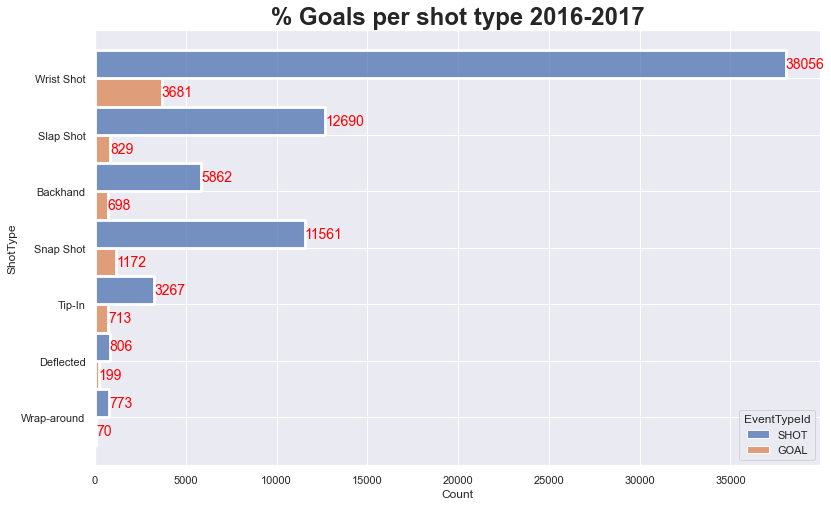

In [19]:
sns.set(rc={'figure.figsize':(13,8)})

hue_order = ['SHOT', 'GOAL'] 
ax = sns.histplot(data=df1, y="ShotType", hue="EventTypeId", hue_order=hue_order, multiple="dodge")

for p in ax.patches: 
    ax.text(p.get_width(),
            p.get_y() + p.get_height()/2.,
            p.get_width(),
            fontsize=14,
            color='red',
            ha='left',
            va='center')
    
ax.set_title("% Goals per shot type 2016-2017", fontdict= { 'fontsize': 24, 'fontweight':'bold'}) 


In [20]:

# Goal line Coordinates (-89,0) e (89,0)

df1 = df1.replace("right", -1)
df1 = df1.replace("left", 1)
df1["shot_distance"] = ( (df1["rinkSide"]*89-df1['Coordinates.x'])**2 + df1['Coordinates.y']**2   )**(0.5)
df1["shot_range_distance"] = df1["shot_distance"].floordiv(20)*20+20


In [21]:
df2 = df1[['EventTypeId','shot_range_distance']].groupby(['shot_range_distance', 'EventTypeId'])['shot_range_distance'].size().unstack().fillna(0)
df2['totalShot']=df2['SHOT']+df2['GOAL']
df2['percGoal']=0
df2['percGoal']=df2['GOAL']/df2['totalShot']
df2.sort_values(by='shot_range_distance', ascending=True)


EventTypeId,GOAL,SHOT,totalShot,percGoal
shot_range_distance,,,,
20.0,4052,19773,23825,0.170073
40.0,2205,23650,25855,0.085283
60.0,810,22691,23501,0.034467
80.0,141,5187,5328,0.026464
100.0,43,891,934,0.046039
120.0,25,154,179,0.139665
140.0,27,232,259,0.104247
160.0,20,203,223,0.089686
180.0,35,214,249,0.140562


Text(0.5, 1.0, '% Goals per distance')

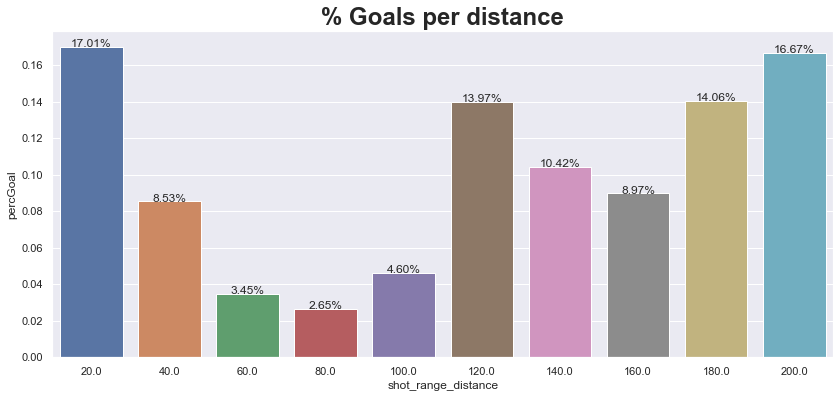

In [22]:
sns.set(rc={'figure.figsize':(14,6)})

p1 = sns.barplot(
        data=df2,
        x=df2.index, y="percGoal")

for p in p1.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = '{:.2f}%'.format(p.get_height()*100)
        p1.text(_x, _y, value, ha="center") 

p1.set_title("% Goals per distance", fontdict= { 'fontsize': 24, 'fontweight':'bold'}) 


In [23]:
df3 = df1.groupby(['ShotType','shot_range_distance', 'EventTypeId'])['ShotType','shot_range_distance'].size().unstack().fillna(0)

df3['totalShot']= (df3['SHOT']+df3['GOAL']).apply(int)
df3['percGoal']= (df3['GOAL']/df3['totalShot']*100).round(2)

#df3.reset_index(inplace=True)
#df3.reset_index()
df3

<ipython-input-23-b474cd20e564>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df1.groupby(['ShotType','shot_range_distance', 'EventTypeId'])['ShotType','shot_range_distance'].size().unstack().fillna(0)


EventTypeId                      GOAL    SHOT  totalShot  percGoal
ShotType   shot_range_distance                                    
Backhand   20.0                 644.0  4105.0       4749     13.56
           40.0                  39.0  1372.0       1411      2.76
           60.0                   5.0   279.0        284      1.76
           80.0                   4.0    52.0         56      7.14
           100.0                  3.0    28.0         31      9.68
...                               ...     ...        ...       ...
Wrist Shot 120.0                 19.0    84.0        103     18.45
           140.0                 20.0   115.0        135     14.81
           160.0                 15.0   130.0        145     10.34
           180.0                 24.0   109.0        133     18.05
           200.0                  3.0    17.0         20     15.00

[61 rows x 4 columns]

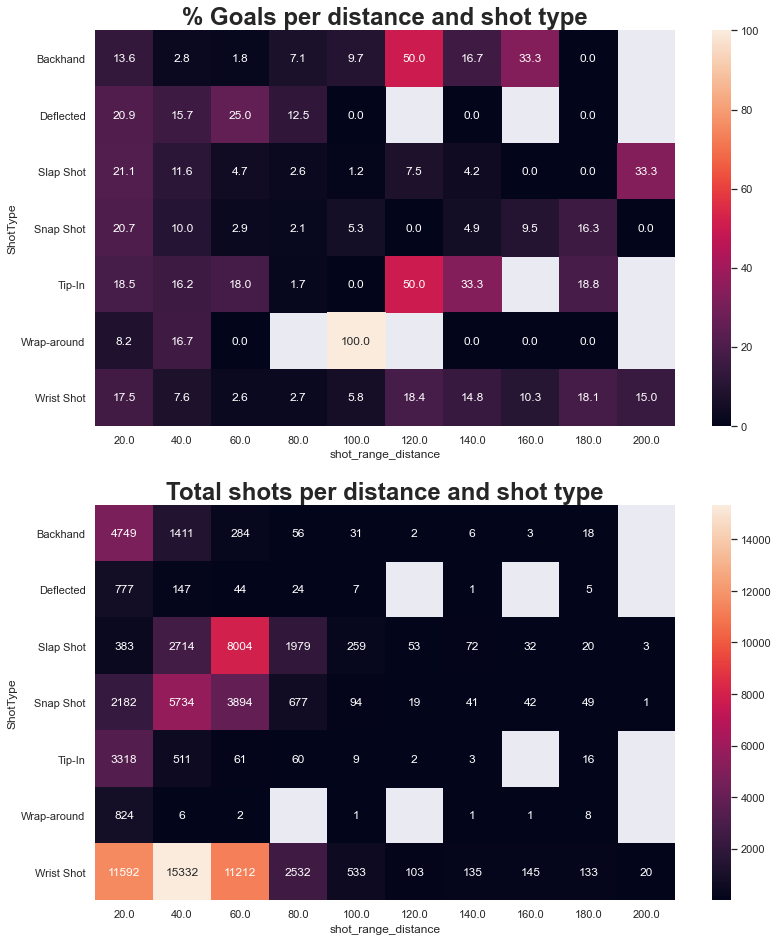

In [24]:
sns.set(rc={'figure.figsize':(13,16)})

f, axes = plt.subplots(2,1)

goals = pd.pivot_table(df3, values='percGoal', index="ShotType", columns='shot_range_distance')

totalShot = pd.pivot_table(df3, values='totalShot', index="ShotType", columns='shot_range_distance')

ax1 = sns.heatmap(goals, annot=True, fmt='.1f' , ax=axes[0]).set_title("% Goals per distance and shot type", 
                                                            fontdict= { 'fontsize': 24, 'fontweight':'bold'})

ax2 = sns.heatmap(totalShot, annot=True, fmt='.0f' , ax=axes[1]).set_title("Total shots per distance and shot type", 
                                                            fontdict= { 'fontsize': 24, 'fontweight':'bold'})
